In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [2]:
data=pd.read_csv('Company_Data.csv')

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA and Visualization

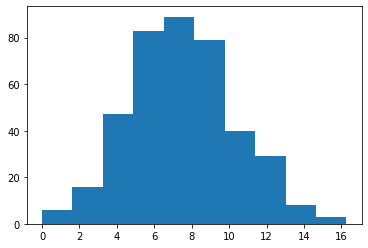

In [4]:
plt.hist(x=data['Sales'])
plt.show()

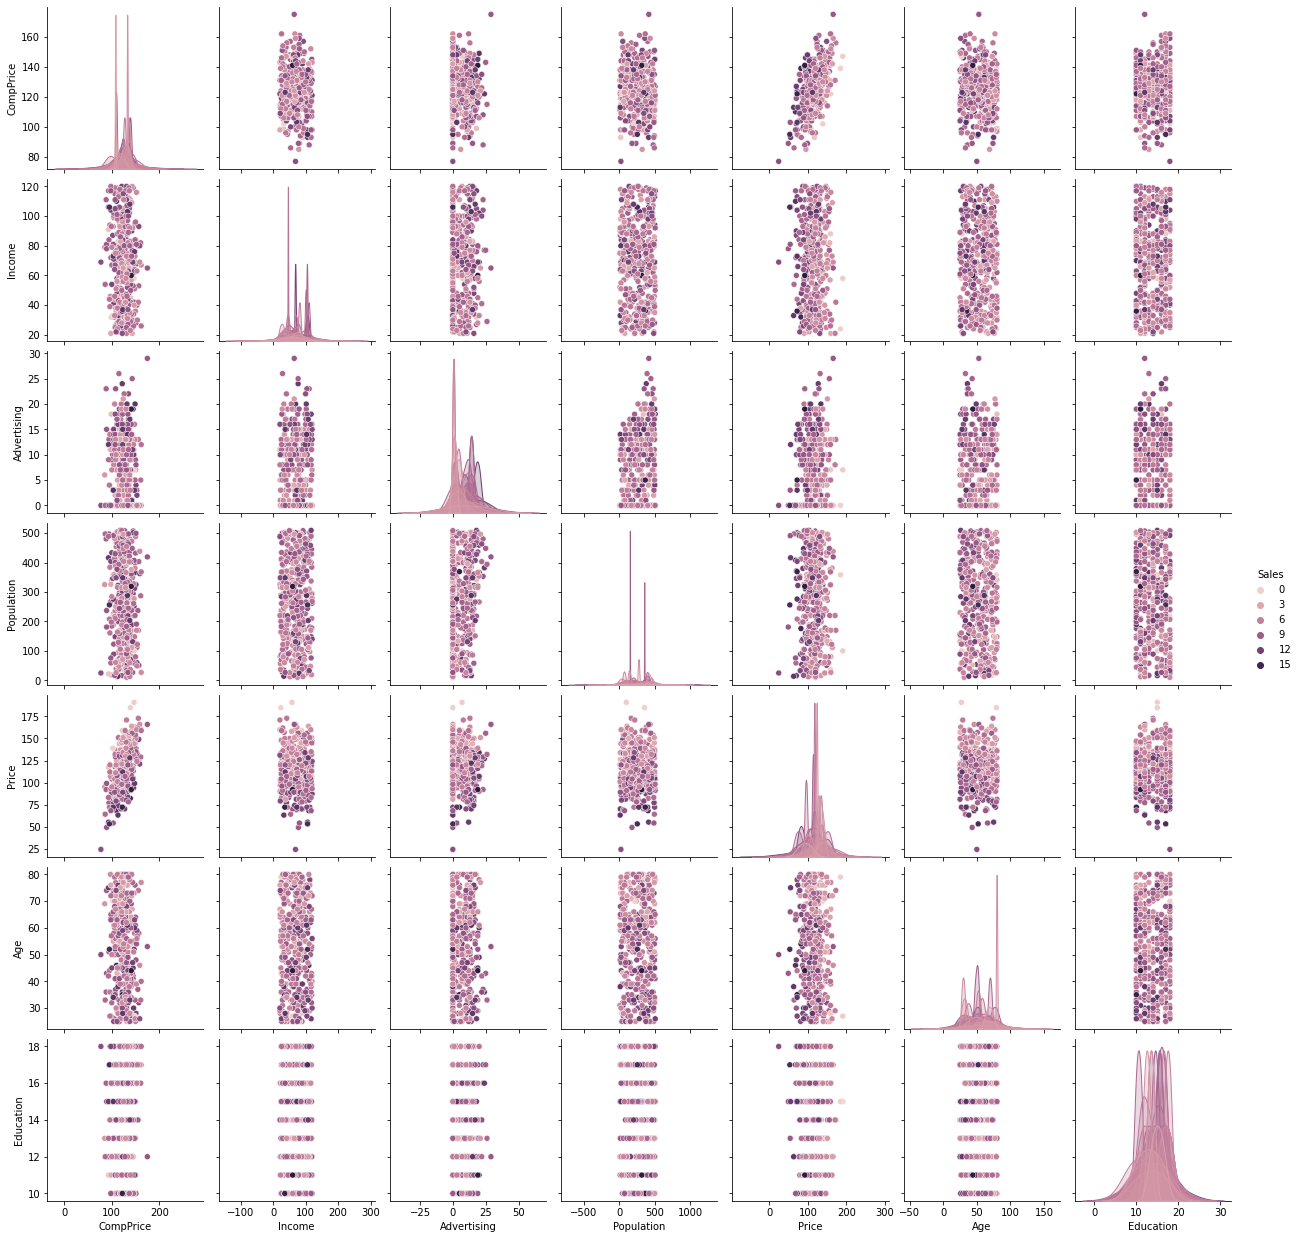

In [5]:
sns.pairplot(data=data, hue = 'Sales')

In [6]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [186]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,2.027500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.672961,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,1.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,2.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,3.000000,80.000000,18.000000,1.000000,1.000000


In [7]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [8]:
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [188]:
# Bucketing the Values using quartile range so we have equal distribution
data['labels']=pd.cut(x=data['Sales'],bins=[0,5.4,7.5,9.3,17],labels=[0,1,2,3])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,labels
0,9.50,138,73,11,276,120,3,42,17,1,1,3
1,11.22,111,48,16,260,83,1,65,10,1,1,3
2,10.06,113,35,10,269,80,2,59,12,1,1,3
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,3
396,6.14,139,23,3,37,120,2,55,11,0,1,1
397,7.41,162,26,12,368,159,2,40,18,1,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1,1


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

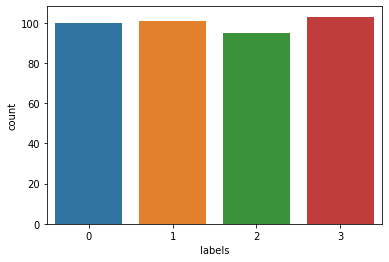

In [189]:
sns.countplot(data['labels'])

In [190]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban_Yes         uint8
US_Yes            uint8
labels         category
dtype: object

In [191]:
data['labels'].value_counts()

3    103
1    101
0    100
2     95
Name: labels, dtype: int64

In [192]:
x_1= data.iloc[:,1:11]
y_1= data['labels']

# Normalization

In [193]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [194]:
x= norm_func(x_1)
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,1.0,0.309091,0.875,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.0,0.727273,0.000,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.5,0.618182,0.250,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.5,0.545455,0.500,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,0.0,0.145455,0.500,1.0,1.0
396,0.632653,0.020202,0.103448,0.054108,0.574850,0.5,0.545455,0.125,0.0,1.0
397,0.867347,0.050505,0.413793,0.717435,0.808383,0.5,0.272727,1.000,1.0,1.0
398,0.234694,0.585859,0.241379,0.549098,0.425150,1.0,0.454545,0.250,1.0,1.0


In [195]:
le=LabelEncoder()
y=le.fit_transform(y_1)
y

array([3, 3, 3, 1, 0, 3, 1, 3, 1, 0, 2, 3, 0, 3, 3, 2, 2, 3, 3, 2, 1, 3,
       0, 1, 3, 3, 2, 0, 0, 2, 3, 2, 1, 2, 0, 3, 2, 0, 1, 0, 0, 2, 3, 0,
       0, 0, 3, 0, 0, 3, 0, 0, 2, 1, 0, 1, 3, 0, 1, 0, 2, 1, 0, 2, 2, 0,
       2, 2, 3, 2, 3, 1, 1, 3, 1, 2, 3, 2, 0, 2, 2, 2, 3, 0, 0, 2, 2, 3,
       1, 2, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 3, 2, 0, 2, 2, 1, 1, 3, 1, 2, 2, 3, 3, 1, 0, 0, 2, 1,
       3, 2, 0, 1, 0, 1, 3, 3, 1, 1, 1, 0, 2, 2, 0, 3, 2, 3, 3, 3, 2, 1,
       1, 2, 1, 3, 3, 3, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 2, 3, 2, 1, 4, 2,
       1, 3, 3, 2, 0, 1, 0, 0, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 3, 3, 2, 0, 0, 1, 0, 3, 3,
       3, 1, 1, 0, 0, 1, 2, 2, 0, 3, 0, 2, 3, 2, 3, 1, 3, 3, 1, 0, 3, 3,
       0, 2, 2, 3, 1, 0, 0, 0, 2, 0, 2, 1, 3, 2, 0, 2, 0, 0, 2, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 3, 0, 3, 3, 1, 1, 1, 2, 1, 0, 0, 3, 2, 0, 1, 2,
       2, 1, 1, 2, 3, 1, 3, 3, 3, 0, 2, 0, 3, 3, 2,

## Spliting Data

In [196]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

## Model
### We are creating a decision tree classifier using Gini criterion.
### Entropy also could have been used 

In [273]:
model= DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=7)

## Tree Plot

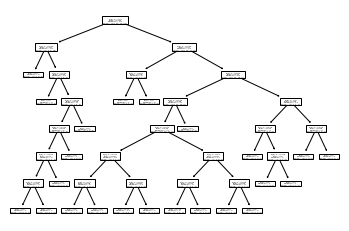

In [274]:
tree.plot_tree(model);

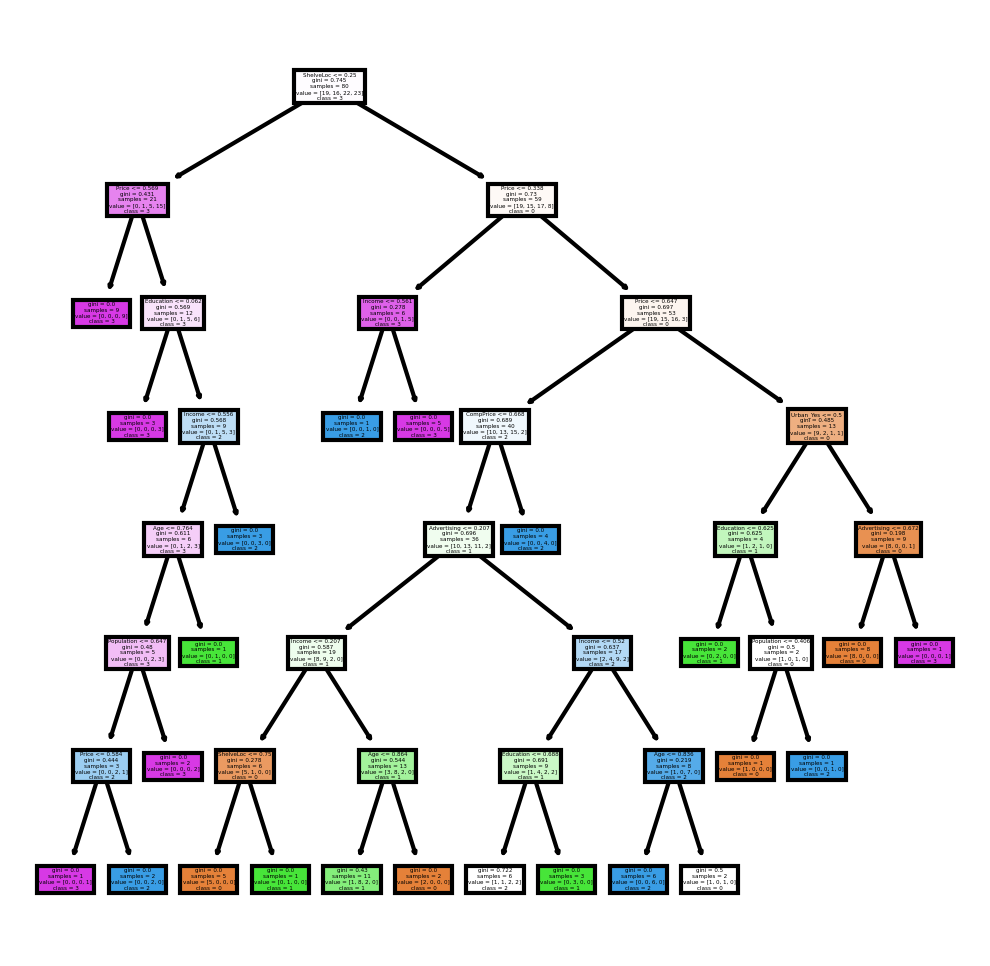

In [275]:
features=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_Yes','US_Yes']
class_=['0','1','2','3']
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=features,class_names=class_,filled=True);

## Predicting Values

In [276]:
prediction= model.predict(x_test)
pd.Series(prediction)
pd.crosstab(y_test,prediction)

col_0,0,1,2,3
row_0,,,,
0,17,1,1,0
1,0,15,1,0
2,1,2,19,0
3,0,0,2,21


In [277]:
import numpy as np
a=np.mean(prediction==y_test)
print('Accuracy is',a*100)

Accuracy is 90.0


## Model Evaluation for the above tree

In [317]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,auc
from sklearn import metrics

In [279]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.94      0.88        16
           2       0.83      0.86      0.84        22
           3       1.00      0.91      0.95        23

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.90      0.90        80



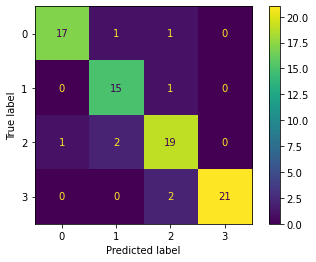

In [288]:
confu = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu, display_labels = [0,1,2,3])

cm_display.plot()
plt.show()

In [379]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, prediction))
rms

0.4183300132670378

## On evaluating the above model we find that 
1. The F1 scores are the following: 

* 0-0.92
* 1-0.88
* 2-0.84
* 3-0.95


2. The Accuracy is 90%
3. The RMSE value is  0.42
## All the above parameters sugest that this is a good model